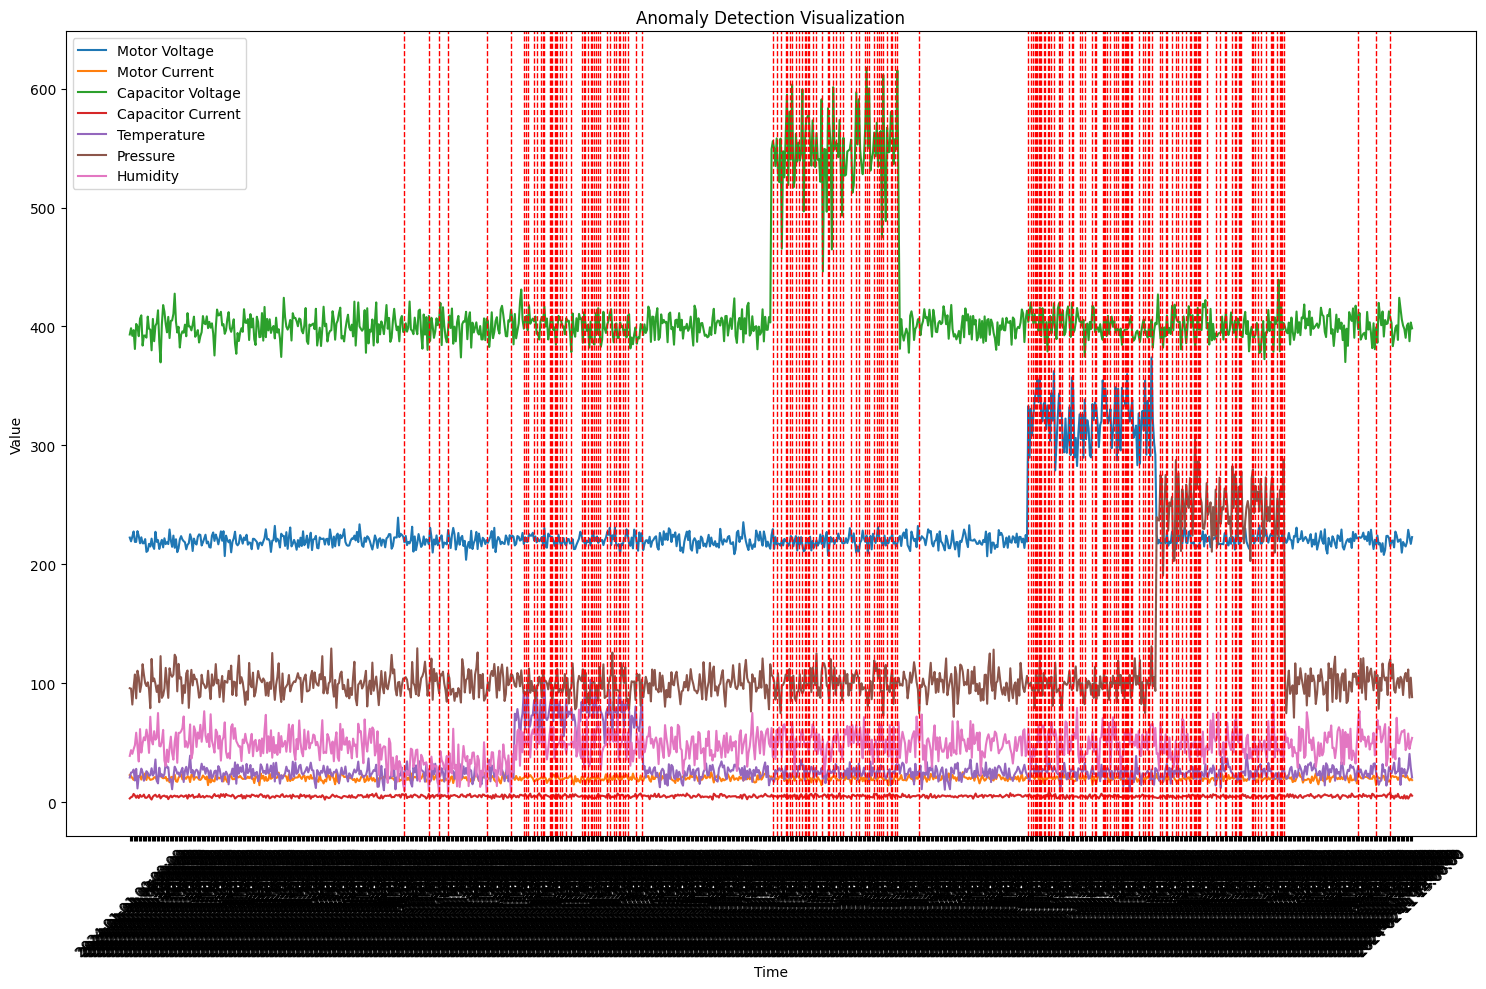

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/Users/mits-mac-001/Code/simple_classifier/anamoly_detection/motor_data.csv")

# Define a function to detect anomalies using z-score
def detect_anomalies(series, threshold=3):
    mean = series.mean()
    std_dev = series.std()
    z_scores = (series - mean) / std_dev
    return np.abs(z_scores) > threshold

# Define threshold for anomaly detection
threshold = 3

# Detect anomalies for each feature
anomalies = {}
for column in data.columns[1:]:
    anomalies[column] = detect_anomalies(data[column], threshold)

# Combine all anomalies into a single DataFrame
anomalies_df = pd.DataFrame(anomalies)

# Mark rows with any anomaly as True
anomalies_df['Any Anomaly'] = anomalies_df.any(axis=1)

# Plot the original data
plt.figure(figsize=(15, 10))
for column in data.columns[1:]:
    plt.plot(data['Time'], data[column], label=column)

# Plot anomalies as vertical lines
for idx, row in anomalies_df.iterrows():
    if row['Any Anomaly']:
        plt.axvline(x=data.loc[idx, 'Time'], color='r', linestyle='--', linewidth=1)

plt.title('Anomaly Detection Visualization')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
anomalies_df['Any Anomaly'][500:600]

500    False
501     True
502    False
503    False
504     True
       ...  
595    False
596     True
597    False
598     True
599    False
Name: Any Anomaly, Length: 100, dtype: bool

In [64]:
from PIL import Image, ImageFilter
import numpy as np

# Load the two images
image1 = Image.open('/Users/mits-mac-001/Downloads/frames/frame_0254.jpg')
image2 = Image.open('/Users/mits-mac-001/Downloads/frames/frame_0255.jpg')

# Convert images to numpy arrays
array1 = np.array(image1)
array2 = np.array(image2)

# Calculate the absolute difference between the images
diff = np.abs(array1 - array2)

# Calculate the sum of absolute differences (SAD)
sad = np.sum(diff)

# Set a threshold for detecting movement
threshold = 100000000  # Adjust this threshold as needed based on your images

# Determine if movement is detected
if sad > threshold:
    print("Movement detected")
else:
    print("No movement")


Movement detected


In [99]:
from PIL import Image
import numpy as np
import cv2


def detect_movement(image_path1, image_path2):
    # Load the two images
    image1 = Image.open(image_path1)
    image2 = Image.open(image_path2)

    # Convert images to grayscale
    gray1 = image1.convert('L')
    gray2 = image2.convert('L')
    
    # Apply edge detection using the FIND_EDGES filter
    edges1 = gray1.filter(ImageFilter.FIND_EDGES)
    edges2 = gray2.filter(ImageFilter.FIND_EDGES)

    # Convert images to numpy arrays
    array1 = np.array(edges1)
    array2 = np.array(edges2)

    # Calculate the absolute difference between the images
    diff = np.abs(array1 - array2)

    # Threshold the difference
    threshold = 256  # Adjust this threshold as needed
    diff_thresholded = (diff > threshold).astype(np.uint8)

    # Count the number of non-zero pixels (indicating movement)
    movement_pixels = np.count_nonzero(diff_thresholded)

    # Determine if movement is detected
    if movement_pixels > 0:
        return True
    else:
        return False



# Example usage:
image_path1 = '/Users/mits-mac-001/Downloads/frames/frame_0244.jpg'
image_path2 = '/Users/mits-mac-001/Downloads/frames/frame_0245.jpg'
image_path3 = '/Users/mits-mac-001/Downloads/frames/frame_0254.jpg'
image_path4 = '/Users/mits-mac-001/Downloads/frames/frame_0255.jpg'

difference = detect_movement(image_path3, image_path4)
print("Difference between the images:")
print(difference)
# 116958144586.9958

Difference between the images:
False


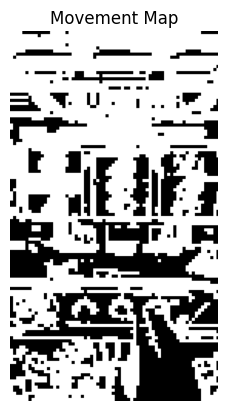

In [106]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

def block_based_motion_estimation(image_path1, image_path2, block_size=16, threshold=30):
    # Load the two images
    image1 = Image.open(image_path1)
    image2 = Image.open(image_path2)

    # Convert images to grayscale
    gray1 = image1.convert('L')
    gray2 = image2.convert('L')

    # Apply edge detection using the FIND_EDGES filter
    edges1 = gray1.filter(ImageFilter.FIND_EDGES)
    edges2 = gray2.filter(ImageFilter.FIND_EDGES)

    # Convert images to numpy arrays
    array1 = np.array(edges1)
    array2 = np.array(edges2)

    # Initialize movement map
    movement_map = np.zeros_like(array1, dtype=np.uint8)

    # Iterate over blocks in the images
    for y in range(0, array1.shape[0], block_size):
        for x in range(0, array1.shape[1], block_size):
            # Extract blocks from both images
            block1 = array1[y:y+block_size, x:x+block_size]
            block2 = array2[y:y+block_size, x:x+block_size]

            # Calculate absolute difference between blocks
            diff = np.abs(block1.astype(np.int32) - block2.astype(np.int32))

            # If any pixel difference exceeds threshold, mark as movement
            if np.any(diff > threshold):
                movement_map[y:y+block_size, x:x+block_size] = 255

    # Show the movement map
    plt.imshow(movement_map, cmap='gray')
    plt.title('Movement Map')
    plt.axis('off')
    plt.show()

# Example usage:

block_based_motion_estimation(image_path1, image_path2)
